# MNIST 

In [4]:
# import libraries
import numpy as np
import pandas as pd
import sklearn as sk
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [7]:
# fetch the data from sklearn's inbuilt library
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [18]:
X,y = mnist.data,mnist.target

In [20]:
X.shape

(70000, 784)

In [21]:
y.shape

(70000,)

In [22]:
print('X rows, columns:',X.shape)
print('y rows, columns:',y.shape)

X rows, columns: (70000, 784)
y rows, columns: (70000,)


In [23]:
# above tells us that we have 70000 images and 784 features
# each image has a 28*28 pixel
# each feature represents pixel intensity from 0 (white) to 255 (black)

In [24]:
# lets look at one digit from the dataset
some_digit = X[5]
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [27]:
some_digit.shape # so actually, the above is an image in the form of an array that is one dimensional and has 784 elements
# resembling each pixel in the image

(784,)

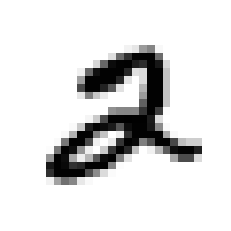

In [29]:
# lets reshape this to a 28*28 array and display it using matplotlib
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [30]:
# looks like a two! lets see if our label suggests that..
some_label = y[5]
print(some_label)

2


In [31]:
# yup, it does!

In [32]:
# check to see if label in string format:
y[5]

'2'

In [34]:
# we need to cast this to an integer as some ML algorithms only work with numbers
# we will use numpys inbuilt data type modification, which in this case is uin8 because we have 0-255 digits
y = y.astype(np.uint8)
y[5] # check to see if it works

2

In [35]:
# we must create a test set which will not be touched
# MNIST dataset has predefined train test split i.e. first 60k training and last 10k test
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [45]:
# we can simplify this process by reducing to a binary classifier, by just predicting one digit i.e. 2 in this case
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [46]:
# now lets train our data on a classification algorithm
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_2)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
# now we can use the above to check if we can predict 2 accurately
sgd_clf.predict([some_digit])

array([ True])

In [48]:
# now lets evaluate the model, evaluating classification models is more complex than regression models
# lets measure accuracy using cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_2,cv=3,scoring='accuracy')

array([0.96645, 0.95895, 0.904  ])

In [49]:
# above 90% accuracy in 1ll 3 folds but lets not be fooled

In [51]:
# lets create a dumb 'not 2' classifier
from sklearn.base import BaseEstimator
class Never2Classifier(BaseEstimator):
    def fit(self,X_train,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
        

In [53]:
never_2_clf = Never2Classifier()
cross_val_score(never_2_clf,X_train,y_train_2,cv=3,scoring='accuracy')

array([0.90355, 0.8993 , 0.89925])

In [54]:
# almost 90% accuracy cos only about 10% of images are 2, so if you are always predicting not 2 then you are bound to get
# it right 90% of the time

In [55]:
# pick up from writing sklearn classes
# better way to predict performance in a classification problem is to use the confusion matrix
from sklearn.model_selection import cross_val_predict

In [56]:
y_train_predict = cross_val_predict(sgd_clf,X_train,y_train_2,cv=3)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix(y_train_2,y_train_predict)

array([[51538,  2504],
       [  908,  5050]], dtype=int64)

In [ ]:
# pickup from confusion matrix